<a href="https://colab.research.google.com/github/sara-javed/Pytorch-week4/blob/main/01_PyTorchWorkflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pytorch Workflow**

Let explore an example pytorch end-to-end workflow.

Resourses:
* Ground truth notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb

* Book version of notebook - https://www.learnpytorch.io/01_pytorch_workflow/

* Ask a question - https://github.com/mrdbourke/pytorch_deep_learning/discussion

In [1]:
what_where_covering = {1: "data (prepare and load)",
                       2: " build model",
                       3: "fitting the model to data (training)",
                       4: "making prediction and evaluting a model (inference)",
                       5: "saving and loading a model",
                       6: "putting it all together"
                       }
what_where_covering


{1: 'data (prepare and load)',
 2: ' build model',
 3: 'fitting the model to data (training)',
 4: 'making prediction and evaluting a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn  # nn contains all of Pytorch building blocks for neural networks
import matplotlib.pyplot as plt

#check Pytorch version
torch.__version__


'2.6.0+cu124'

## Data (preparing and loading)

data can be almost anything... in machine learning

* Excel speadsheet
* Image of my kind
* Video  (youTube has lots of data...)
* Auido like songs or podcasts
* DNA
* Text

machine learning is a game of two parts:
1. Get data into a numerical representation.

2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

we'll use a linear regression formula to make a straight line with known **parameter**




In [3]:
# Create *known* parameter
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]



(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
len(X)  , len(y)

(50, 50)

## Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test with our data.


In [7]:
#Create a train/test split
train_split = int(0.8 * len(X))
X_train , y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, Visualize, Visualize"

In [13]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  #plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
  if predictions is not None:
    #plot predictions in red (predictions in test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    #show the legend
    plt.legend(prop={"size": 14});

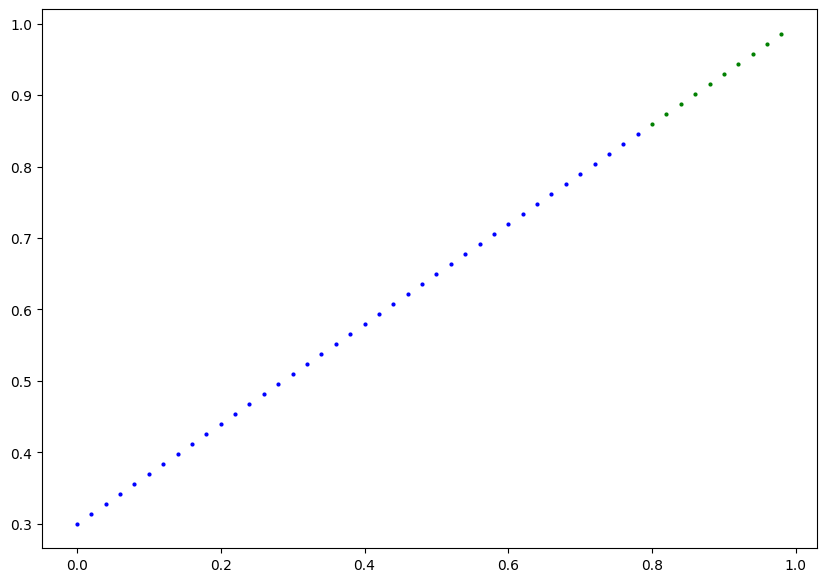

In [14]:
plot_predictions();

## 2. Build model

our first PyTorch model!

This is very exciting... let's do it!

Because we're going to be building classes throughout the course, I'd recommend getting familiar with OOP in python: https://realpython.com/python3-object-oriented-programming/

What our model does:
* start with the random values (weight, bias)

* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent - https://youtu.be/IHZwWFHWa-w
2. back propagation - https://youtu.be/IIg3gGewQ5U


In [15]:
from typing_extensions import Required
#create linear regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.parameter(torch.randn(1,
                                                requires_grad = True,
                                                dtype=torch.float))
        self.bias = nn.parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        #Forward method to define the computation in the model
        def forward(self, x: torch.Tensor) -> torch.Tensor:
            return self.weights * x + self.bias  #this is the linear regression formula



